In [1]:
import pandas as pd
import numpy as np
import re

import importlib
import matplotlib.pyplot as plt

from xgboost import XGBRegressor


from sklearn.model_selection import  train_test_split

import shap
shap.plots.initjs()

import pickle

import gzip

/Users/willtong/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.chdir('../')
# importlib.reload(functions.plot_summary_plot)
from functions.model_wrapper import Tree_Model, xgboost_params
from functions.shap import create_shape_explanation, plot_summary_plot

In [3]:
with gzip.open('data/gzipX_all.pckl', 'rb') as f:
    X_all = pickle.load(f)


In [4]:
with open('data/gbm_explanation_1p25-4_all_2.pckl', 'rb') as f:
    explanation_test = pickle.load(f)

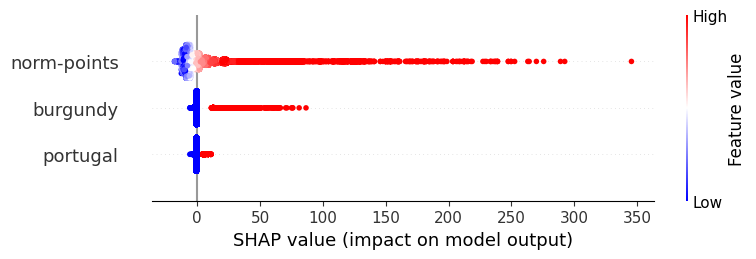

In [5]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=[], word_filter_exclusivity= True, max_display = 3)

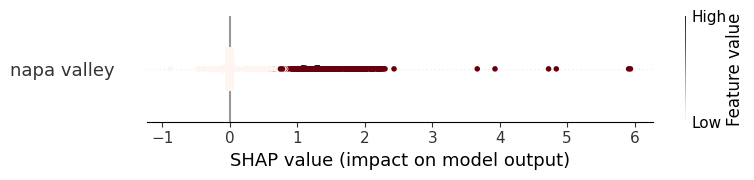

In [6]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['napa valley'], word_filter_exclusivity= True, max_display = 3)

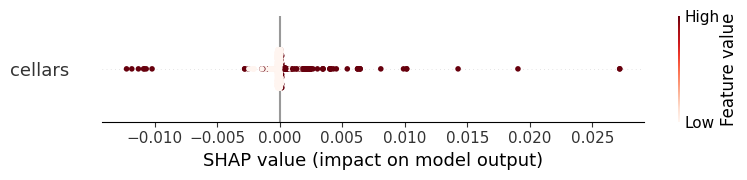

In [7]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['cellars'], word_filter_exclusivity= True, max_display = 3)

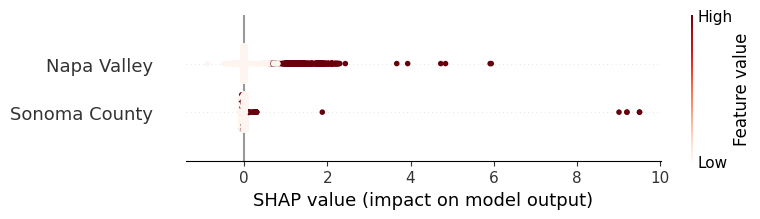

In [8]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['sonoma', 'napa'], word_filter_exclusivity= False, max_display = 2)

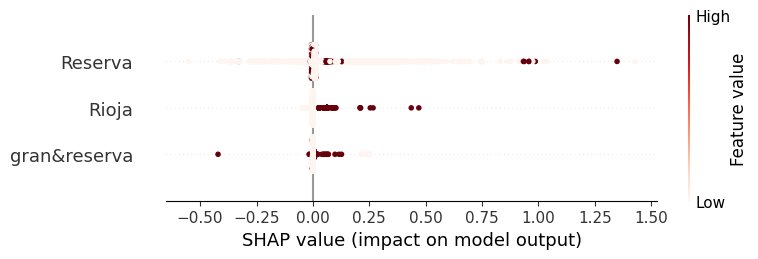

In [14]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['Rioja', 'reserva'], word_filter_exclusivity= False, max_display = 3)

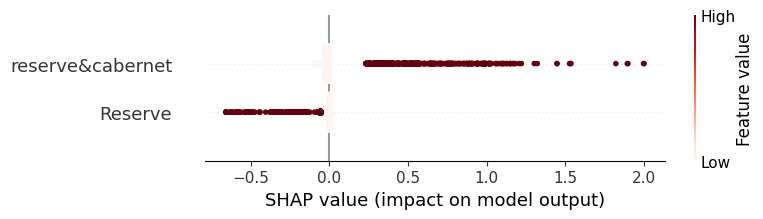

In [19]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['reserve'], word_filter_exclusivity= False, max_display = 2)

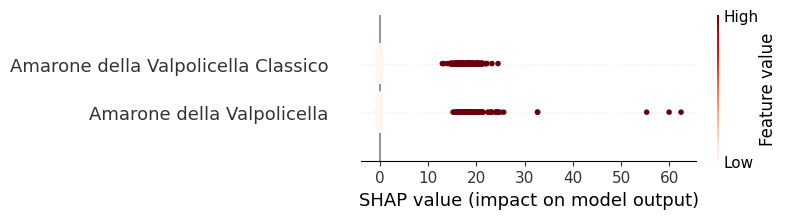

In [17]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['amarone'], word_filter_exclusivity= False, max_display = 2)

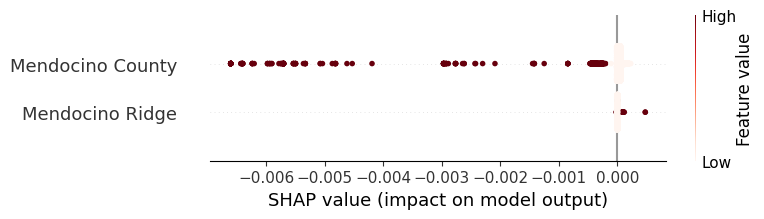

In [23]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['mendocino'], word_filter_exclusivity= False, max_display = 2)

In [ ]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['mendocino'], word_filter_exclusivity= False, max_display = 2)

In [27]:
X_all.sum().sort_values()[-40:]

taster-name_Matt Kettmann           6237.0
merged_Estate                       6303.0
merged_Bordeaux                     6367.0
title_2007                          6496.0
merged_Spain                        6573.0
title_2008                          6724.0
merged_Napa                         6810.0
merged_Blanc                        7466.0
variety_style                       7858.0
region-2_Columbia Valley            8058.0
merged_Washington                   8583.0
merged_Sonoma                       9017.0
title_2009                          9052.0
taster-name_Paul Gregutt            9498.0
taster-name_Virginie Boone          9507.0
title_2015                          9641.0
taster-name_Kerin O’Keefe           9874.0
title_cabernet&sauvignon           10115.0
merged_Central Coast               11005.0
title_2010                         11102.0
merged_Chardonnay                  11305.0
title_2011                         11436.0
title_pinot&noir                   11631.0
merged_Cabe

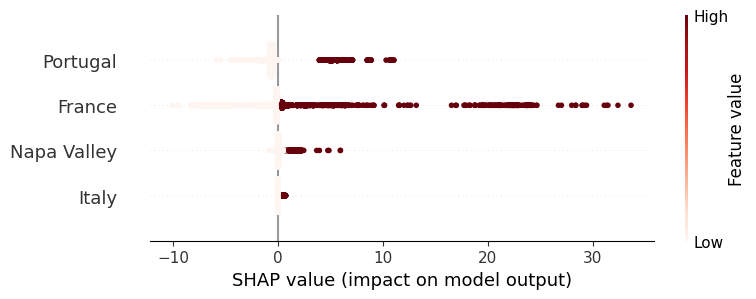

In [34]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['France', 'Italy', 'Portugal', 'Napa Valley'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)


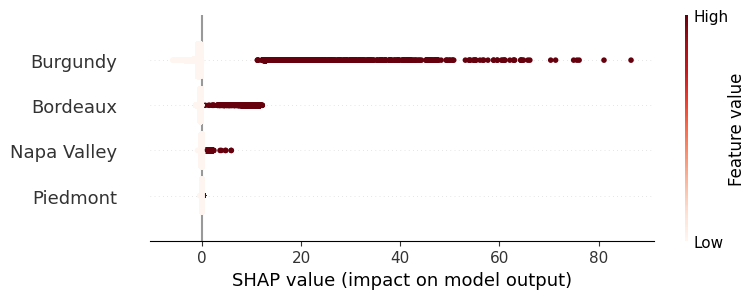

In [35]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['Piedmont', 'Bordeaux', 'Burgundy', 'Napa Valley'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)

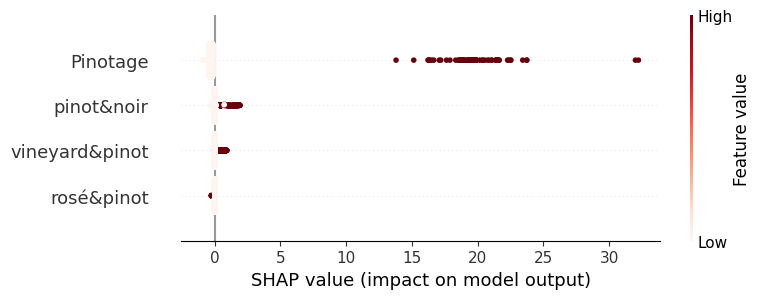

In [64]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['pinot'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)

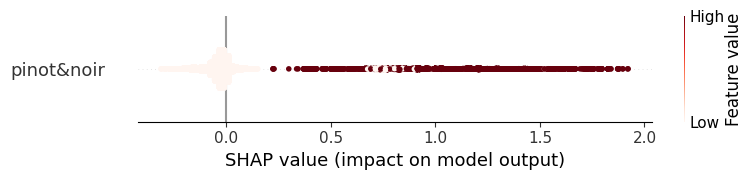

In [44]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['pinot&noir'], 
                  word_filter_exclusivity= False, 
                  max_display = 2)

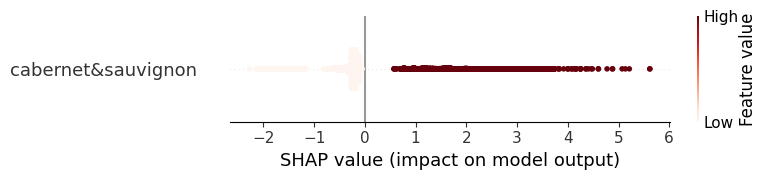

In [45]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['cabernet&sauvignon'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)

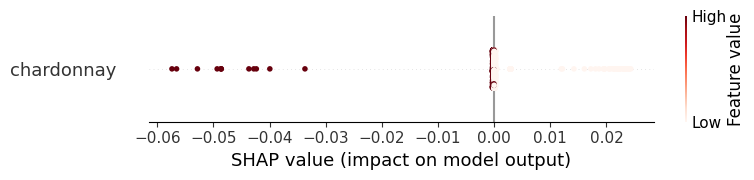

In [52]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['chardonnay'], 
                  word_filter_exclusivity= True, 
                  max_display = 4)

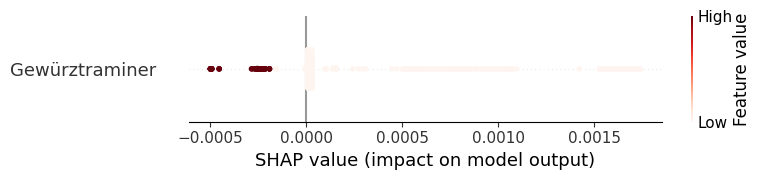

In [53]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['Gewürztraminer'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)

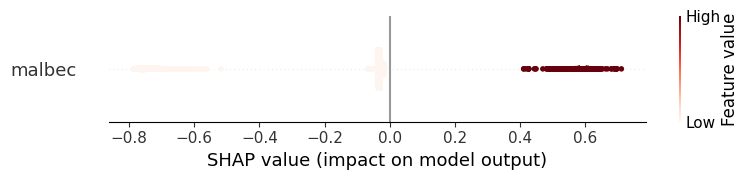

In [54]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['malbec'], 
                  word_filter_exclusivity= True, 
                  max_display = 4)

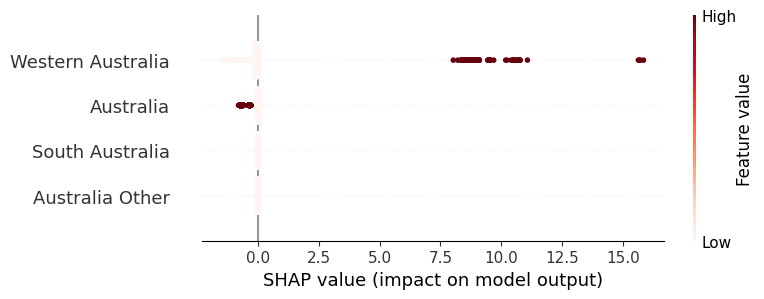

In [60]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['australia'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)

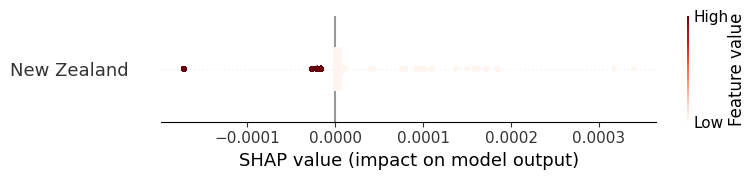

In [63]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=['zealand'], 
                  word_filter_exclusivity= False, 
                  max_display = 4)

In [68]:
X_all[[feature for feature in X_all.columns if "variety" in feature]].sum()

variety_Corvina,        496
variety_Dolcetto        168
variety_Fiano           130
variety_GSM             180
variety_Gamay           875
variety_Garganega       218
variety_Glera           604
variety_Grosso          589
variety_Melon           241
variety_Molinara        497
variety_Portuguese     3243
variety_Rhône          1823
variety_Rondinella,     496
variety_Sémillon        132
variety_Tinta           206
variety_Turbiana        146
variety_Verdicchio      161
variety_Vernaccia       126
variety_d'Avola         326
variety_style          7858
dtype: int64

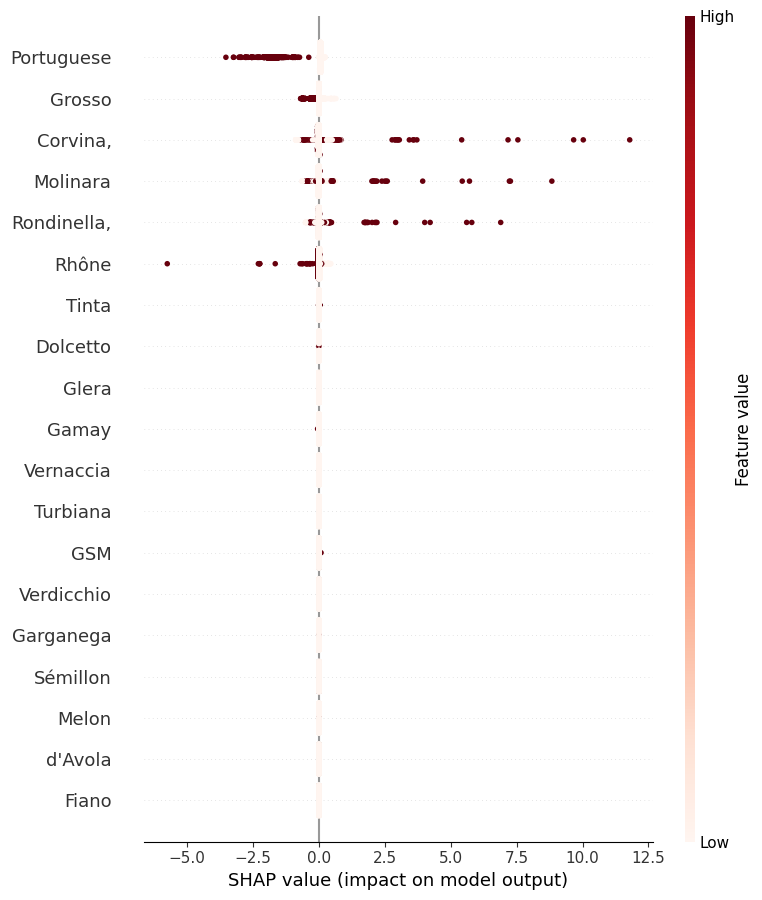

In [72]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=[feature for feature in X_all.columns if "variety" in feature][:-1], 
                  word_filter_exclusivity= False, 
                  max_display = 50)